# 2DI70 Statistical Learning Theory 
## Assignment 1

### Group x
Name1 ID1

Name2 ID2

Name3 ID3

In [96]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import numpy as np
import operator


#### Load MNIST data from csv files

In [97]:
train_small = pd.read_csv("MNIST_train_small.csv").values
test_small  = pd.read_csv("MNIST_test_small.csv").values

In [98]:
## Normalizing the data is probably not necessary for this specific dataset
X_train_s = train_small[:, 1:]/255.0
y_train_s = train_small[:,0]

X_test_s = test_small[:, 1:]/255.0
y_test_s = test_small[:,0]

#### Define functions

In [99]:
## Render chosen data point as image
def show_img(data, index):
    plt.imshow(data[index].reshape(28,28), cmap = "Greys")
    plt.show()

In [100]:
## Compute the nth root of given value
def n_root(val, p):   
    return val**(1 / float(p))
  
## Compute Minkowski distance for two given vectors
## Use p = 2 for Euclidian distance
def minkowski_dist(x1, x2, p):    
    p_sum = sum(pow(abs(a-b), p) for a, b in zip(x1, x2))
    return n_root(p_sum, p) 
  
v1 = X_train_s[0]
v2 = X_train_s[1]
print(minkowski_dist(v1, v2, 2)) 

8.617445178210408


In [101]:
## Compute p-minkowski distance from point to every datapoint in collection
## The list of labels should share length and indices with collection
def compute_dists(point, collection, labels, p):
    vals = []
    for i in range(len(collection)):
        d = minkowski_dist(point, collection[i], p)
        vals.append([i, d, labels[i]])
    
    return vals

#### Do KNN magic

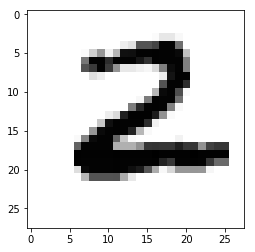

In [102]:
## Compute knn for example data
show_img(X_test_s, 0)
dists1 = compute_dists(X_test_s[0], X_train_s, y_train_s, 2)

In [103]:
## Since the point we selected is in the training set, it shows up in the list with a distance of 0
## In this case, we can confidently say it is a 3
dists1_sorted = sorted(dists1, key = lambda x: float(x[1]))
dists1_sorted[0:20]

[[1135, 5.3865168364513, 2],
 [2930, 6.176237779614883, 2],
 [1839, 6.359115856708896, 2],
 [2931, 6.971545396350763, 2],
 [1673, 7.1679066012479415, 2],
 [1745, 7.241429992960301, 2],
 [674, 7.360805206442928, 2],
 [1959, 7.46974314606631, 2],
 [2869, 7.472301795139638, 2],
 [1058, 7.590140106469208, 2],
 [394, 7.816389685297066, 2],
 [20, 7.866137843152389, 2],
 [535, 7.8670723020162905, 2],
 [1936, 7.948569785196725, 2],
 [1146, 7.982502009483685, 2],
 [402, 8.022200070046882, 2],
 [2694, 8.041375128432373, 2],
 [1943, 8.087366085202186, 2],
 [629, 8.16194129232512, 2],
 [2707, 8.167651236462792, 2]]

In [ ]:
#Predefine top k value, length range r of test data to select
k = 1
r = len(X_test_s)
error = 0
percent_error = error/r
#for each x in test set, compute the distance with all x in training set, then sort in distance for top 20 nearest neighbors
for i in range(r):
    dists = compute_dists(X_test_s[i], X_train_s, y_train_s, 2)
    dists_sorted = sorted(dists, key = lambda x: float(x[1]))
    list = dists_sorted[0:k] #get list top 20 nearest neighbors with its [index,distance,label] 
     
#count frequency of labels of the top 20 nearest neighbors
    pred_class = {}
    for j in range(k):
        labels = list[j][-1]
        if labels in pred_class:
            pred_class[labels] += 1
        else:
            pred_class[labels] = 1
        #sort the most frequency labels at the beginning, return the prediction as the most frequency label at first position
    sortedVotes = sorted(pred_class.items(), key=operator.itemgetter(1), reverse=True) 
    if sortedVotes[0][0] != y_test_s[i]:
        error = error + 1
    #print(sortedVotes[0][0],y_test_s[i],error)
print("total percentage of error" + str(error/r))

    
